# Project: Predicting Boston Housing Prices

## Getting Started
The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns


# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

/Users/jonad/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration

### Implementation: Calculate Statistics

In [2]:
#Minimum price of the data
minimum_price = np.amin(prices)

#Maximum price of the data
maximum_price = np.amax(prices)

#Mean price of the data
mean_price = np.mean(prices)

#Median price of the data
median_price = np.median(prices)

#Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Summary Statistics

In [3]:
print "first 5 rows of the data\n"
print data.head()
print "\n"
print "data types of variables\n"
print data.dtypes
print "\n"
print "Summary Statistics\n"
print data.describe()

first 5 rows of the data

      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0


data types of variables

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object


Summary Statistics

               RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06


Our data looks clean with no missing value. Next we will do some visualizations to see the distribution.

### Visualizations

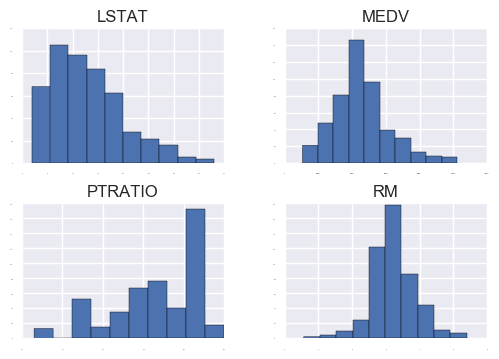

In [4]:
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

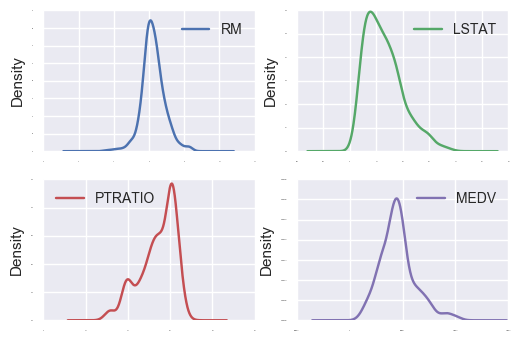

In [5]:
# Density plot
data.plot(kind='density', subplots=True, layout=(2,2), sharex=False, sharey=False, legend=True, fontsize=1)
plt.show()

`'LSTAT'` appears to be right skewed, `'PTRATIO'` appears to be left skewed, `'MEDV'` and `'RM'` look almost normal. Next we will explore the correlation among those variables.

### Correlations

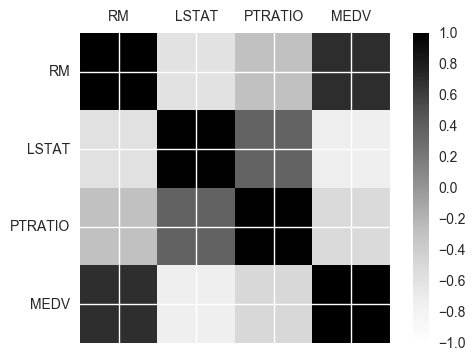

In [6]:
# correlation matrix
names = ['RM', 'LSTAT', 'PTRATIO', 'MEDV']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation= 'none' )
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

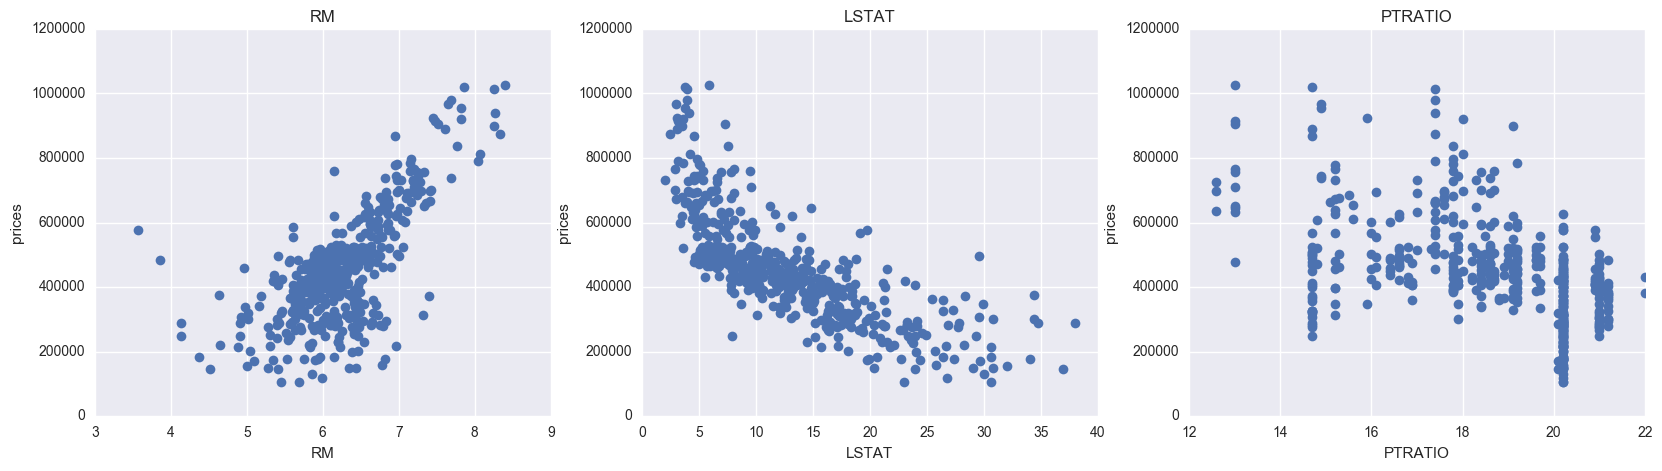

In [7]:
plt.figure(figsize=(20,5))
for i, col in enumerate(features.columns):
    plt.subplot(1,3, i+1)
    plt.plot(data[col], prices, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

### Feature Observation

Intuitively we can infer the following
- An increase in the value of `'RM'` might result in an increase in the value of `'MEDV'`, since more rooms indicate bigger home size thus can accommodate more people.
- An increase in the value of `'LSTAT'`, might result in an decrease in the value of `'MEDV'`, since low income people tend to have a low purchasing power.
- An increase in the value of `'PTRATIO'`, might result in an increase in the value of `'MEDV'`, because a low `'PTRATIO'` can indicate better education for the children in the town.
    
From the correlations figures shown above, we can infer the following:
- An increase in the value of `'RM'` will result in an increase in the value of `'MEDV'`, since they have a positive correlation.
- An increase in the value of `'LSTAT'`, w result in an decrease in the value of `'MEDV'`, since they have a negative correlation.

----

## Developing a Model

### Implementation: Define a Performance Metric

In [8]:
#Import the metric
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Goodness of Fit

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Model has a coefficient of determination, R^2, of 0.923.


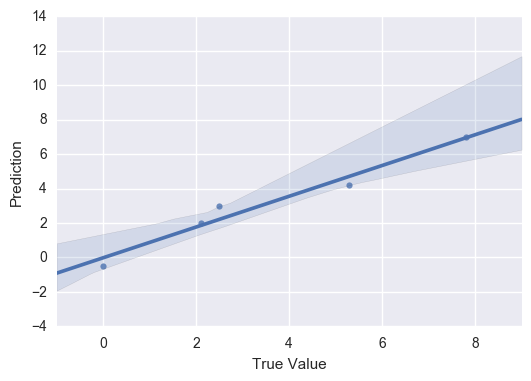

In [9]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

import seaborn as sns
sample_df = pd.DataFrame([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3]).reset_index()
sample_df.columns = ['True Value', 'Prediction']
sns.regplot('True Value', 'Prediction', sample_df)

With a high score of 92.3% on unseen data, we can say that our model captures the variance of our target variable.

### Implementation: Shuffle and Split Data

In [10]:
# Import 'train_test_split'
from sklearn.cross_validation import train_test_split 
#Shuffle and split the data into training and testing subsets
dataset = data.values
X = dataset[:, 0:3]
Y = dataset[:,3]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state=42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


The benefit of splitting the dataset into a train and test data, will allow us to train our model with the train data, and evaluate it with the test data. An independent testing set helps us produce a better evaluation of how well the model is likely to perform when faced with unseen data and protect our model against overifitting.

----

## Analyzing Model Performance

### Learning Curves

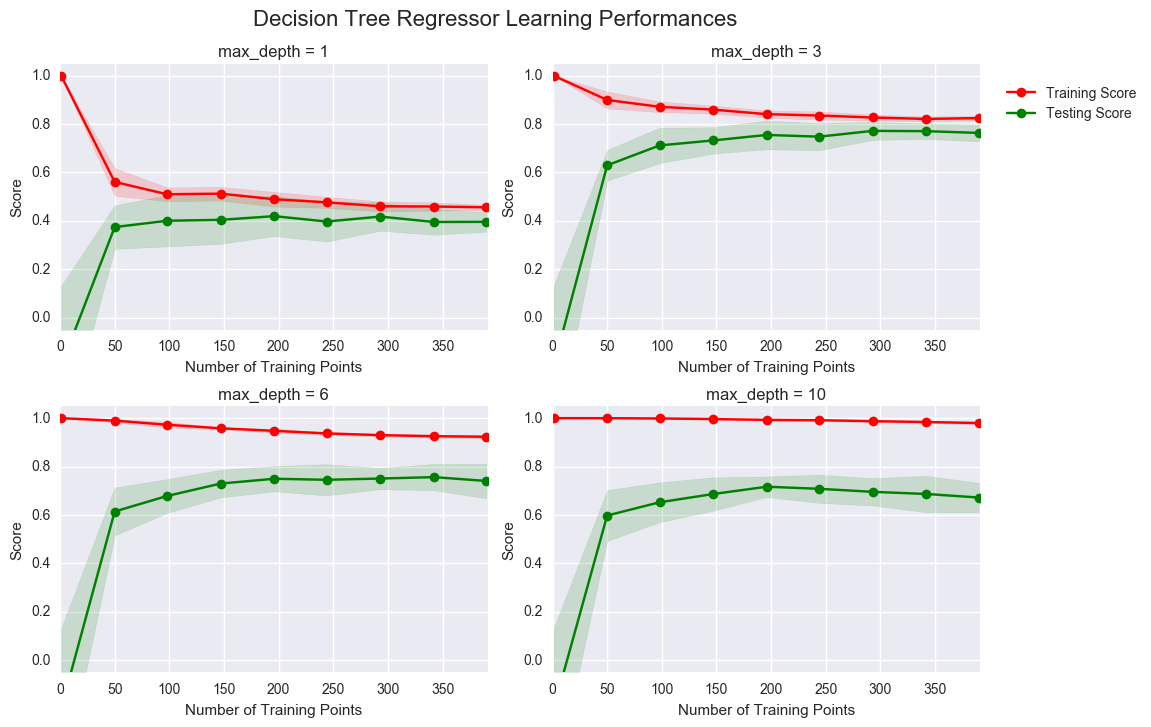

In [11]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Learning the Data

- The graph - with max_depth equals 3 - seems to perform well in both training and testing data. The training and testing curves converge around 0.8 as observations are added. 
- As training points are added, the training and testing scores decrease and increase, respectively before converging.
- Having more training instances might not benefit the model, since both the testing and training scores have already converged to their optimal score.

### Complexity Curves


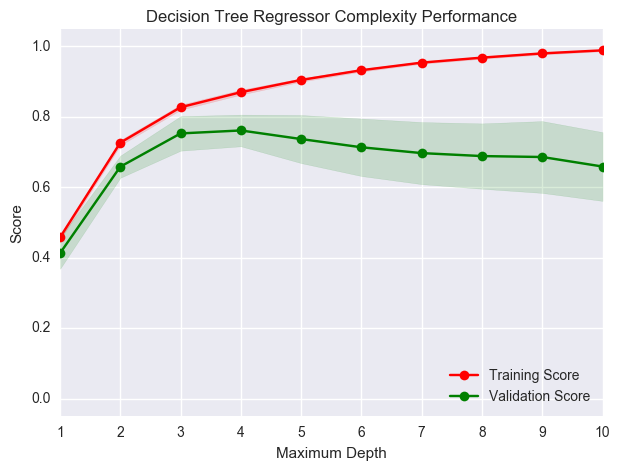

In [18]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff

- When our model is trained with a maximum depth of 1, it suffers from high bias. The training and testing scores decrease and increase respectively before rapidly converging around 0.4 as observations are added. Relatively low training and testing scores suggest that the model suffers from high bias.
- When our model is trained with a maximum depth of 10, it suffers from high variance. The training scores are almost constant, with a value close to 1. The testing scores increase rapidly and then slowly, with a maximum value around 0.7. A training score that is much higher than its corresponding testing score suggests that the model suffers from high variance.

### Best-Guess Optimal Model

The maximum depth of 4 best generalizes to unseen data, since at that point, both scores start diverging.

-----

## Evaluating Model Performance


### Grid Search

- Grid search is a parameter tuning technique, that will build and evaluate a model for each combination of algorithm parameters specified in the grid. It exaustively tries every combination of the provided hyper-parameter values in order to find the best possible model.
- Grid search can be applied, by specifying a dictionary of algorithm hyper-parameter values that we seek to optimize.

### Cross-Validation: k-fold

k-fold cross-validation is a technique used during the model selection phase of the machine learning process. It divides the sample data into a k-sized subsamples called fold. The algorithm is then trained and validated k times using k-1 folds for training and one fold for validation. At each training and validation round a different fold is used for validation. The k results is then averaged to produce a single estimation which is the final performance of the model. The final model captures the variance of our data - it is less bias -, since all observations are used for both training and validation, and each observation is used for validation exactly once. It can be combined with grid search, to provide a more robust estimate of our model for each combination of hyper-parameters, thus allowing grid search to choose a more robust model.

----
k-fold cross-validation with 5 splits is described as the following:
    - We split the data into 5 folds.
    - We train a model on the 4 folds, 5 times, and use the remaining fold as the validation set.
    - For each model we calculate the validation error (5 errors rates here)
    - Then at the end, all of the error rates are averaged together. (single number) 

### Implementation: Fitting a Model

In [25]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':  range(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(r2_score)

    # Create the grid search object
    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions

#### Optimal Model

In [26]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


 The decision tree with the maximum depth value of 4 is the optimal model.

### Predicting Selling Prices

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |


Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


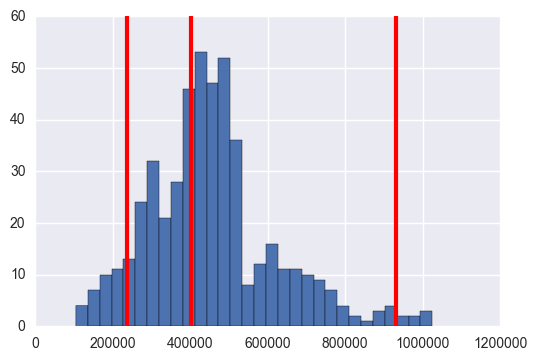

In [27]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
    
plt.hist(prices, bins = 30)
for price in reg.predict(client_data):
    plt.axvline(price, c = 'r', lw = 3)

### Sensitivity

In [22]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Applicability
- The constructed model should not be used in a current real-world setting for the following reasons:
   - The data were collected in 1978, and it is more likely irrelevant today.
   - We don’t know how the data where collected, the current location of each observation.
   - The data only use 3 features to describe a home. A home has other features that influence its value in the market such as: the size, the number of bathroom, whether the home has a garage or not, and many other features.
   - The model is not robust enough, the coefficient of determination is around 0.8.


### Final model visualization

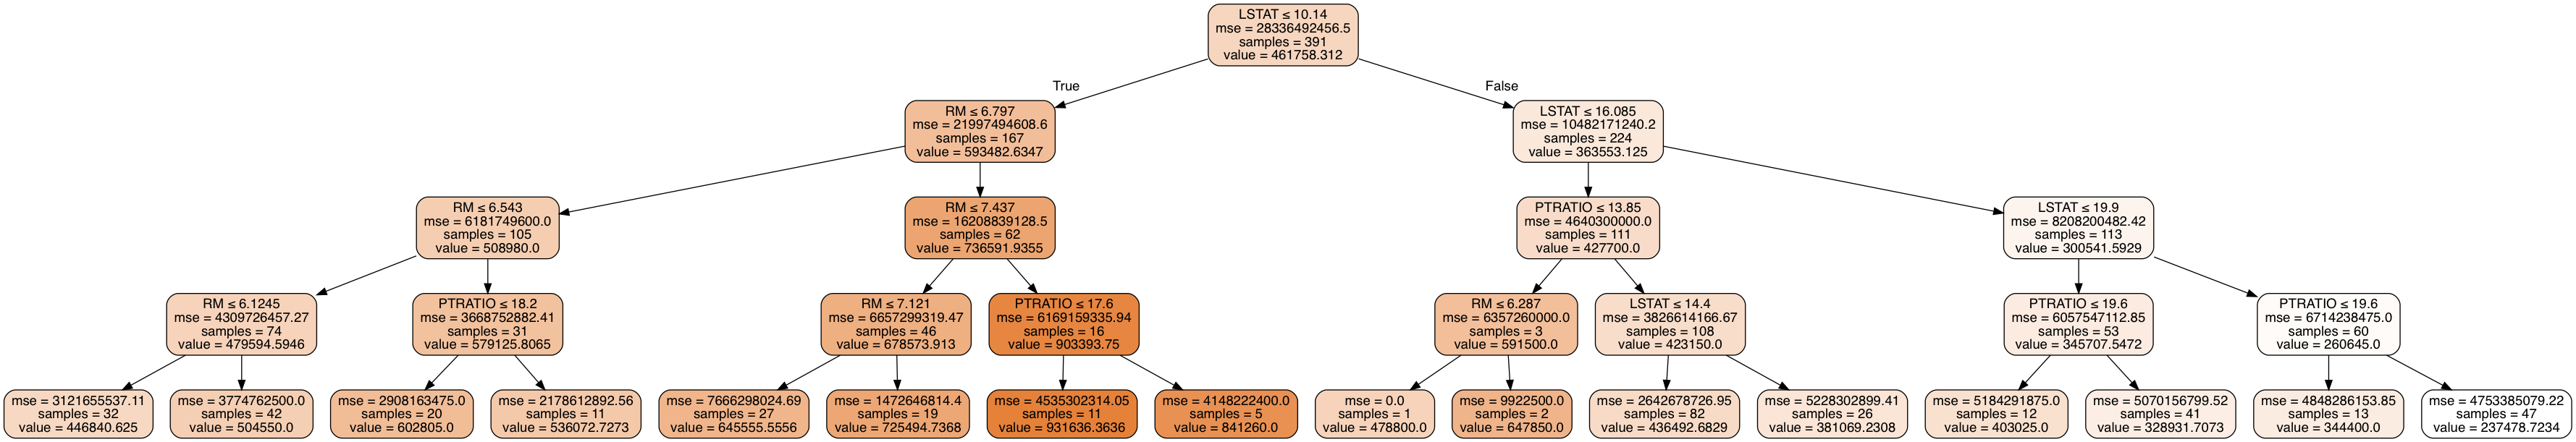

In [23]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydot
from sklearn import tree

clf = tree.DecisionTreeRegressor(max_depth=4)
clf = clf.fit(X_train, y_train)
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
    feature_names=features.columns,
    class_names="PRICES",
    filled=True, rounded=True,
    special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())